In [2]:
import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt

#Twitter API credentials
consumer_key='6L537g5grVVV7qYaBA65TvWtr'
consumer_secret='fBco2UHMlkD7WHiDMU2R9f4ZSlCUEnBWAFA8vUfnEQst5mj1OZ'
access_key='875362759-cfuXuhiIhdhH3kpKMrL6zyKSJYYnetl4OanSs0K4'
access_secret='CprxuIjjpoqMb48eDYPUq1Mmp7CHqNfJCobzISCADJUvy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())
apis = tweepy.API(auth, wait_on_rate_limit=True)


In [4]:
def getUserInfo(name):
    
    #applied list comprehension
    tweets = [user.text for user in tweepy.Cursor(apis.user_timeline, screen_name=name, include_rts=False).items(500)]
    
    user = apis.get_user(name)
    print('User: %s\n'%user.name)
    
    if len(tweets) >= 20:
        df = pd.DataFrame(columns=['Tweets','D','P','R','S','V'])
        df['Tweets'] = tweets

        cur_dir = os.getcwd()
        json_dir = '..\Keywords\\Cognitive'
        os.chdir(json_dir)

        files = os.listdir()
        #print(files)

        json = [0,1,2,3,4]
        for index,file in enumerate(files):
            json[index] = pd.read_json(file, typ='series')

        os.chdir(cur_dir)

        for value,file in enumerate(json):
            for files in zip(file.keys(),file.values):
                for index,tweets in enumerate(df.Tweets):
                    if files[0].lower() in tweets.lower(): df.iloc[index, [value+1]] = files[1]


        labels = df.iloc[:,1:6].sum()
        print(labels)
        total = labels.sum()


        final_value = {}
        for value in zip(labels.keys(),labels.values):
            final_value[value[0]] = (value[1]/total) * 100
        print(final_value)    
        
        

        plt.pie(final_value.values(), labels=final_value.keys(), labeldistance=1.2)
        plt.title('Pie Chart')
        plt.show()

        plt.bar(final_value.keys(), final_value.values(), align='center')
        plt.title('Bar Chart')
        plt.ylabel('Category')
        plt.xlabel('Percentage')
        plt.show()
    
    else:
        print("Not much data to process.")

In [1]:
name='MaryamNSharif'
#applied list comprehension
tweets = [user.text for user in tweepy.Cursor(apis.user_timeline, screen_name=name, include_rts=False).items(1000)]

user = apis.get_user(name)
print('User: %s\n'%user.name)
print('Total Tweets: %s\n'%len(tweets))

if len(tweets) >= 30:
    df = pd.DataFrame(columns=['Tweets','D','P','R','S','V'])
    df['Tweets'] = tweets

    cur_dir = os.getcwd()
    json_dir = '..\Keywords\\Cognitive'
    os.chdir(json_dir)

    files = os.listdir()
    #print(files)

    json = [0,1,2,3,4]
    for index,file in enumerate(files):
        json[index] = pd.read_json(file, typ='series')

    os.chdir(cur_dir)

    for value,file in enumerate(json):
        for files in zip(file.keys(),file.values):
            for index,tweets in enumerate(df.Tweets):
                if files[0].lower() in tweets.lower(): df.iloc[index, [value+1]] = files[1]


    labels = df.iloc[:,1:6].sum()
    print(labels)
    total = labels.sum()


    final_value = {}
    for value in zip(labels.keys(),labels.values):
        final_value[value[0]] = (value[1]/total) * 100
    print(final_value)    
    


    plt.pie(final_value.values(), labels=final_value.keys(), labeldistance=1.2)
    plt.title('Pie Chart')
    plt.show()

    plt.bar(final_value.keys(), final_value.values(), align='center')
    plt.title('Bar Chart')
    plt.ylabel('Category')
    plt.xlabel('Percentage')
    plt.show()

else:
    print("Not much data to process.")

NameError: name 'tweepy' is not defined

User: Junaid Khanzada

D    0.000000
P    1.800000
R    0.000000
S    3.300000
V    0.483486
dtype: float64
{'D': 0.0, 'P': 32.23792383042311, 'R': 0.0, 'S': 59.10286035577569, 'V': 8.659215813801199}


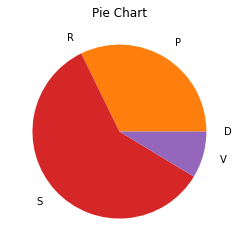

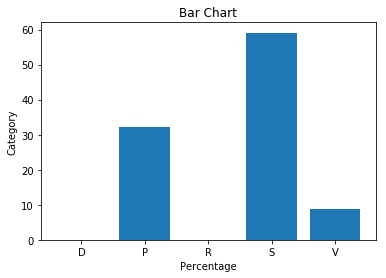

In [7]:
getUserInfo('JunaeedKhanzada')